In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from dmba import classificationSummary
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
#Importing the Dataset
df = pd.read_csv("diabetes.csv")

In [3]:
#Statistical Description of the Data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#Replace zeros with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [5]:
#Calculating Median values for respective coloumn
median_Glucose = df["Glucose"].median()
median_BloodPressure = df["BloodPressure"].median()
median_SkinThickness = df["SkinThickness"].median()
median_Insulin = df["Insulin"].median()
median_BMI = df["BMI"].median()
median_Glucose = df["Pregnancies"].median()
median_Glucose = df["DiabetesPedigreeFunction"].median()

In [6]:
#Replacing the null values with median value
df['Glucose'].fillna(median_Glucose, inplace=True)
df['BloodPressure'].fillna(median_BloodPressure, inplace=True)
df['SkinThickness'].fillna(median_SkinThickness, inplace=True)
df['Insulin'].fillna(median_Insulin, inplace=True)
df['BMI'].fillna(median_BMI, inplace=True)
df['Pregnancies'].fillna(median_BMI, inplace=True)
df['DiabetesPedigreeFunction'].fillna(median_BMI, inplace=True)

In [7]:
#Check for outliers
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


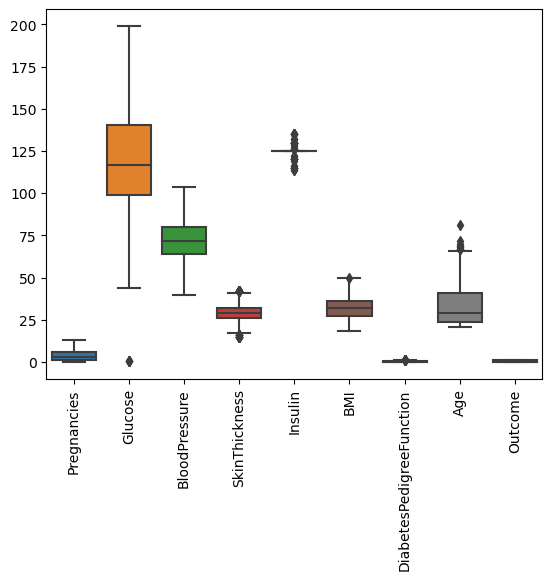

<Figure size 640x480 with 0 Axes>

In [10]:
#Plotting boxplots
sns.boxplot(data=df)
#sns.boxplot(x="variable", y="value", data=df)
plt.xticks(rotation = 'vertical')
plt.show()
plt.savefig('boxplot.png')

In [11]:
# Findout the outliers and convert into zero or Null values
for x in ['Pregnancies','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [12]:
#Replacing outliers values with median value
df['BloodPressure'].fillna(median_BloodPressure, inplace=True)
df['SkinThickness'].fillna(median_SkinThickness, inplace=True)
df['Insulin'].fillna(median_Insulin, inplace=True)
df['BMI'].fillna(median_BMI, inplace=True)
df['Pregnancies'].fillna(median_BMI, inplace=True)
df['DiabetesPedigreeFunction'].fillna(median_BMI, inplace=True)

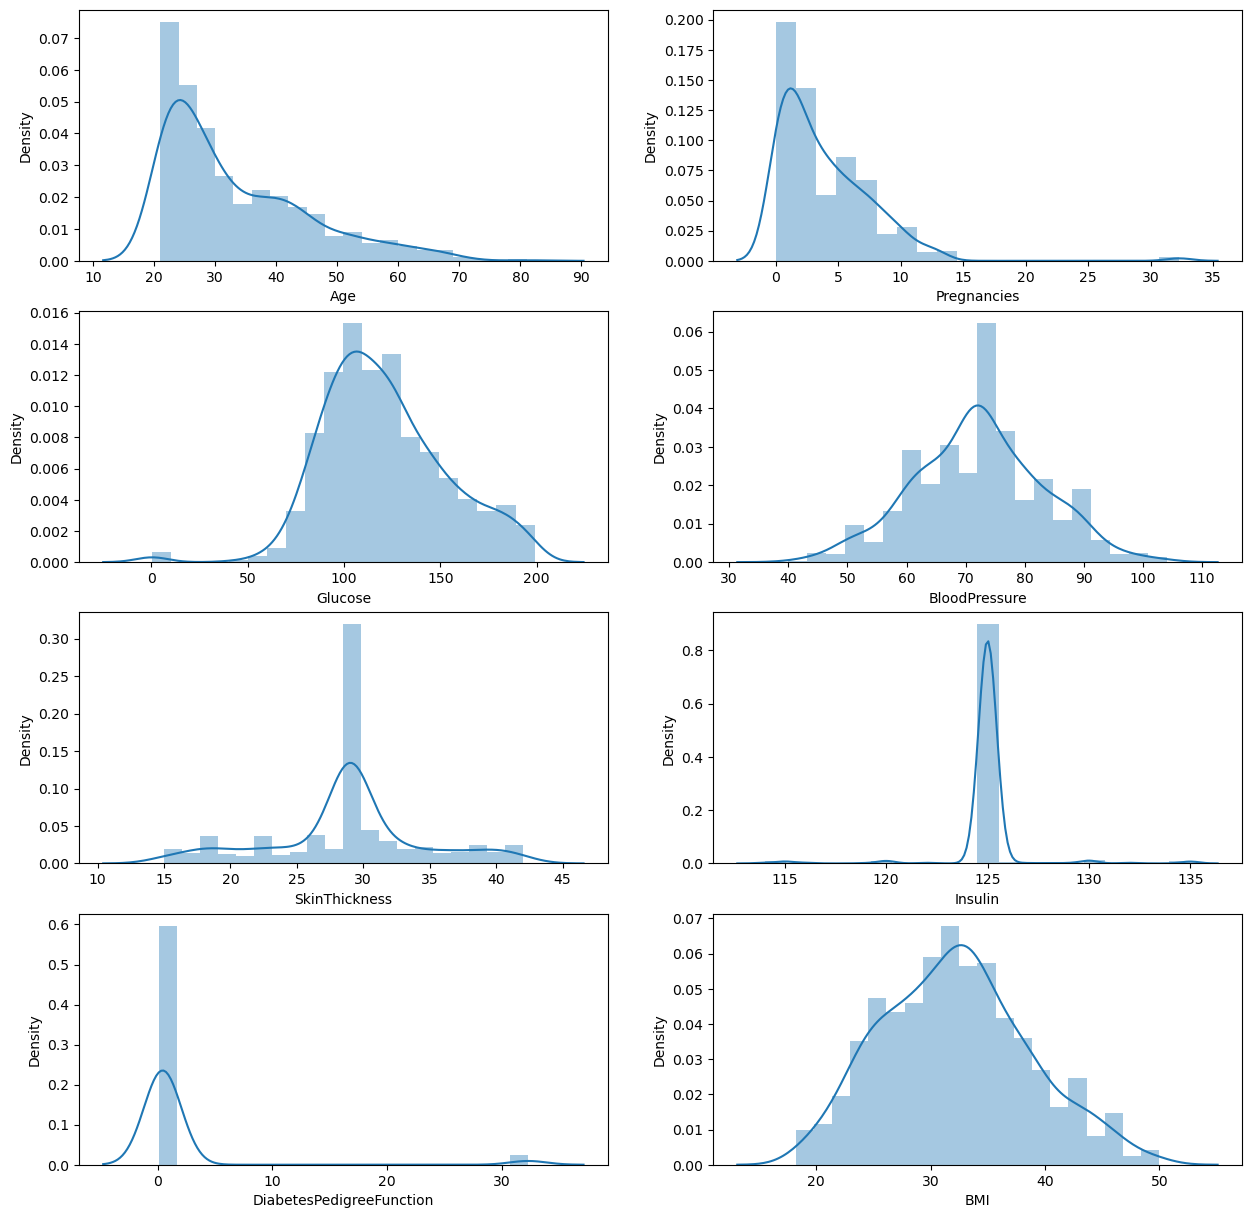

<Figure size 640x480 with 0 Axes>

In [13]:
import warnings
warnings.filterwarnings('ignore')
#Histogram and debsity graphs of all the variables
fig, ax = plt.subplots(4,2, figsize=(15,15))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])
plt.show()
plt.savefig('histogram.png')

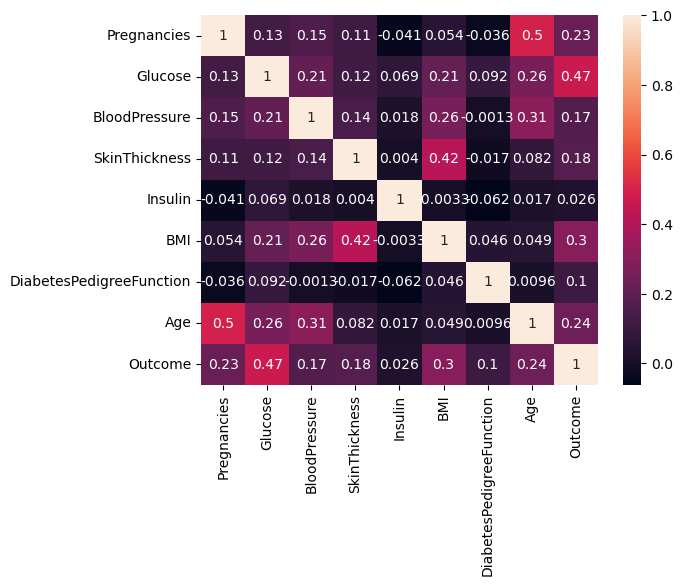

<Figure size 640x480 with 0 Axes>

In [14]:
ax = sns.heatmap(df.corr(), annot=True)
plt.show()
plt.savefig('corr.png')

In [15]:
#Categorizing Data
bins_BMI = [0,18.5, 24.99, 29.999,50]
group_names_BMI = [1,2,3,4]
df['BMI_cat'] = pd.cut(df['BMI'], bins_BMI, labels=group_names_BMI)

bins_Age = [0,14, 24, 64,120]
group_names_Age = [1,2,3,4]
df['Age_cat'] = pd.cut(df['Age'], bins_Age, labels=group_names_Age)

bins_BP = [0,79.99, 88.99,200]
group_names_BP = [1,2,3]
df['BP_cat'] = pd.cut(df['BloodPressure'], bins_BP, labels=group_names_BP)

bins_G = [0,99, 125,200]
group_names_G = [1,2,3]
df['G_cat'] = pd.cut(df['Glucose'], bins_G, labels=group_names_G)

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat,Age_cat,BP_cat,G_cat
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1,4,3,1,3
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0,3,3,1,1
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1,2,3,1,3
3,1.0,89.0,66.0,23.0,125.0,28.1,0.167,21,0,3,2,1,1
4,0.0,137.0,40.0,35.0,125.0,43.1,32.300,33,1,4,3,1,3


In [16]:
#drop unnecessary columns and rearrange the data
df = df.drop(columns=['Glucose', 'BloodPressure','BMI','Age'])
df = df.loc[:,['Pregnancies', 'G_cat','BP_cat','SkinThickness','Insulin','BMI_cat','DiabetesPedigreeFunction','Age_cat','Outcome']]
df.head(5)

,Pregnancies,G_cat,BP_cat,SkinThickness,Insulin,BMI_cat,DiabetesPedigreeFunction,Age_cat,Outcome
0,6.0,3,1,35.0,125.0,4,0.627,3,1
1,1.0,1,1,29.0,125.0,3,0.351,3,0
2,8.0,3,1,29.0,125.0,2,0.672,3,1
3,1.0,1,1,23.0,125.0,3,0.167,2,0
4,0.0,3,1,35.0,125.0,4,32.300,3,1


In [17]:
#Logistic Regression

In [18]:
#Make a copy of the Dataframe
df_logir = df.copy()

In [19]:
#Refering predictors and outcome
y_logir = df_logir['Outcome']
X_logir = df_logir.drop(columns=['Outcome'])

In [20]:
#Splitting Data
X_train_logir, X_valid_logir, y_train_logir, y_valid_logir = train_test_split(X_logir, y_logir, test_size=0.40, random_state=1)

In [21]:
#Running logistic regression algorithm
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train_logir, y_train_logir)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X_logir.columns).transpose())
print()
print('AIC', AIC_score(y_valid_logir, logit_reg.predict(X_valid_logir), df = len(X_train_logir.columns) + 1))

intercept  -0.009991233974502148
       Pregnancies     G_cat    BP_cat  SkinThickness  Insulin   BMI_cat  \
coeff     0.046951  1.309771 -0.138175       0.024224 -0.08734  1.092466   

       DiabetesPedigreeFunction   Age_cat  
coeff                  0.011001  0.948999  

AIC 442.10080542694254


In [22]:
#Calcuating the accuracy of the logistic regresson model
y_pred_logir = logit_reg.predict(X_valid_logir)
accuracy = accuracy_score(y_pred_logir, y_valid_logir)
print("Accuracy:", accuracy)

Accuracy: 0.7694805194805194


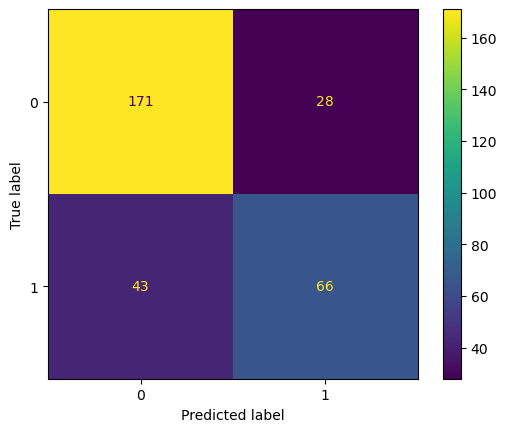

<Figure size 640x480 with 0 Axes>

In [23]:
#plotting confusion matrix
confusion_matrix = metrics.confusion_matrix(y_valid_logir, y_pred_logir)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1'])
cm_display.plot()
plt.show()
plt.savefig('logirCM.png')

In [24]:
#KNN

In [25]:
df_knn = df.copy()

In [26]:
trainData_KNN, validData_KNN = train_test_split(df_knn,test_size=0.4, random_state=24)

In [27]:
#normalizing variables
scaler = preprocessing.StandardScaler()
scaler.fit(trainData_KNN[['Pregnancies', 'G_cat','BP_cat','SkinThickness','Insulin','BMI_cat','DiabetesPedigreeFunction','Age_cat']])

StandardScaler()

In [28]:
diabetesNorm = pd.concat([pd.DataFrame(scaler.transform(df_knn[['Pregnancies', 'G_cat','BP_cat','SkinThickness','Insulin','BMI_cat','DiabetesPedigreeFunction','Age_cat']]),
                                    columns=['nPregnancies', 'nG_cat','nBP_cat','nSkinThickness','nInsulin','nBMI_cat','nDiabetesPedigreeFunction','nAge_cat']),
                                df_knn[['Outcome']]], axis=1)
trainNorm = diabetesNorm.iloc[trainData_KNN.index]
validNorm = diabetesNorm.iloc[validData_KNN.index]

trainNorm

,nPregnancies,nG_cat,nBP_cat,nSkinThickness,nInsulin,nBMI_cat,nDiabetesPedigreeFunction,nAge_cat,Outcome
631,-1.035976,-0.167910,-0.533232,1.861026,-0.001442,0.671006,-0.237571,-1.505034,0
605,-0.772486,-0.167910,-0.533232,0.501102,-0.001442,0.671006,-0.194084,-1.505034,0
310,0.544967,-1.434119,-0.533232,0.161121,-0.001442,-0.682778,-0.225754,0.543237,0
565,-0.508995,-1.434119,-0.533232,-0.008869,-0.001442,-0.682778,-0.157216,-1.505034,0
163,-0.508995,-0.167910,-0.533232,-1.028812,-0.001442,-0.682778,-0.217088,-1.505034,0
...,...,...,...,...,...,...,...,...,...
145,-1.035976,-0.167910,-0.533232,-1.028812,-0.001442,0.671006,-0.184946,-1.505034,0
401,0.544967,1.098299,-0.533232,-0.008869,-0.001442,-2.036563,-0.251278,0.543237,0
343,0.281477,-0.167910,1.194139,-0.008869,-0.001442,0.671006,-0.229378,0.543237,0
192,0.808458,1.098299,-0.533232,-0.008869,-0.001442,0.671006,-0.214725,0.543237,1


In [29]:
train_X_KNN = trainNorm.loc[:, trainNorm.columns != 'Outcome']
train_y_KNN = trainNorm['Outcome']
valid_X_KNN = validNorm.loc[:, validNorm.columns != 'Outcome']
valid_y_KNN = validNorm['Outcome']

In [30]:
#Getting the optimum k value
results = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X_KNN, train_y_KNN)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y_KNN, knn.predict(valid_X_KNN))
    })
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.711039
1    2  0.704545
2    3  0.707792
3    4  0.694805
4    5  0.691558
5    6  0.704545
6    7  0.704545
7    8  0.720779
8    9  0.727273
9   10  0.720779
10  11  0.727273
11  12  0.727273
12  13  0.724026
13  14  0.717532
14  15  0.724026
15  16  0.717532
16  17  0.720779
17  18  0.727273
18  19  0.724026
19  20  0.730519
20  21  0.727273
21  22  0.727273
22  23  0.717532
23  24  0.724026


In [31]:
#Running KNN algorithm with k=19, which has the highest accuracy 
knn = KNeighborsClassifier(n_neighbors=11).fit(train_X_KNN, train_y_KNN)

In [32]:
y_pred_KNN =  knn.predict(valid_X_KNN)
accuracy = accuracy_score(y_pred_KNN, valid_y_KNN)
print("Accuracy:", accuracy)

Accuracy: 0.7272727272727273


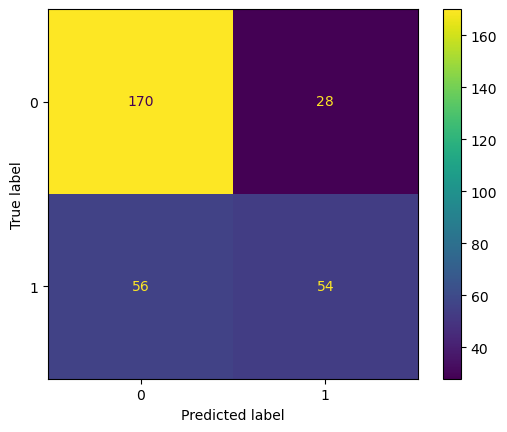

<Figure size 640x480 with 0 Axes>

In [33]:
confusion_matrix = metrics.confusion_matrix(valid_y_KNN, y_pred_KNN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1'])
cm_display.plot()
plt.show()
plt.savefig('knnCM.png')

In [34]:
df_nb = df.copy()

In [35]:
#Starting Naive- Bais predictions
#categorizing data
df_nb.Pregnancies = df_nb.Pregnancies.astype('category')
df_nb.SkinThickness = df_nb.SkinThickness.astype('category')
df_nb.Insulin = df_nb.Insulin.astype('category')
df_nb.DiabetesPedigreeFunction = [round(t * 100) for t in df_nb.DiabetesPedigreeFunction]
df_nb.DiabetesPedigreeFunction = df_nb.DiabetesPedigreeFunction.astype('category')

In [36]:
predictors = ['Pregnancies', 'G_cat','BP_cat','SkinThickness','Insulin','BMI_cat','DiabetesPedigreeFunction','Age_cat']
outcome = 'Outcome'

In [37]:
X_nb = pd.get_dummies(df_nb[predictors])
y_nb = df_nb['Outcome']
classes = ['0', '1']

In [38]:
X_train_nb, X_valid_nb, y_train_nb, y_valid_nb = train_test_split(X_nb, y_nb, test_size=0.40, random_state=1)

In [39]:
dfnb = MultinomialNB(alpha=0.01)
dfnb.fit(X_train_nb, y_train_nb)

MultinomialNB(alpha=0.01)

In [40]:
predProb_train = dfnb.predict_proba(X_train_nb)
predProb_valid = dfnb.predict_proba(X_valid_nb)

In [41]:
y_valid_pred_nb = dfnb.predict(X_valid_nb)
y_train_pred_nb = dfnb.predict(X_train_nb)

In [42]:
y_pred_nb = dfnb.predict(X_valid_nb)
accuracy = accuracy_score(y_pred_nb, y_valid_nb)

print("Accuracy:", accuracy)


Accuracy: 0.6883116883116883


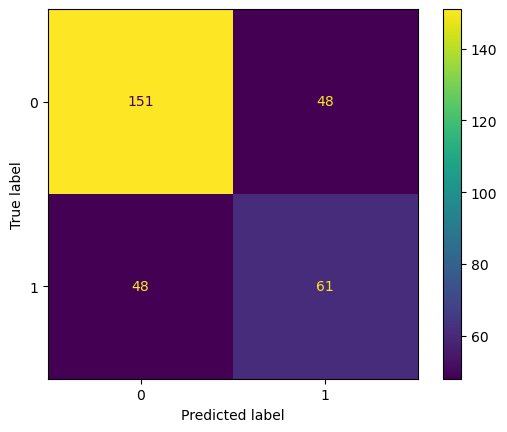

<Figure size 640x480 with 0 Axes>

In [43]:
confusion_matrix = metrics.confusion_matrix(y_valid_nb, y_pred_nb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1'])
cm_display.plot()
plt.show()
plt.savefig('nbCM.png')

In [44]:
#Decission Tree Classifier

In [45]:
df_dt = df.copy()

In [46]:
predictors_dt = ['Pregnancies', 'G_cat','BP_cat','SkinThickness','Insulin','BMI_cat','DiabetesPedigreeFunction','Age_cat']
X_dt = df_dt[predictors_dt]
y_dt = df_dt['Outcome']

In [47]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.4, random_state=4)

In [48]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_dt,y_train_dt)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test_dt)

In [49]:
accuracy = accuracy_score(y_pred_dt, y_test_dt)

print("Accuracy:", accuracy)

Accuracy: 0.6525974025974026


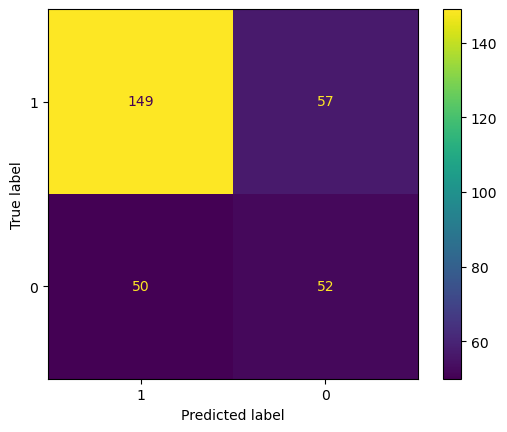

<Figure size 640x480 with 0 Axes>

In [50]:
confusion_matrix = metrics.confusion_matrix(y_test_dt, y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['1', '0'])
cm_display.plot()
plt.show()
plt.savefig('dtCM.png')

In [51]:
#Linear Regression

In [52]:
df_lir = df.copy()

In [53]:
predictors_lir = ['Pregnancies', 'G_cat','BP_cat','SkinThickness','Insulin','BMI_cat','DiabetesPedigreeFunction','Age_cat']
X_lir = df_lir[predictors_lir]
y_lir = df_lir['Outcome']

In [54]:
train_X_lir, valid_X_lir, train_y_lir, valid_y_lir = train_test_split(X_lir, y_lir, test_size=0.4, random_state=1)

In [55]:
diabetes_lm = LinearRegression()
diabetes_lm .fit(train_X_lir, train_y_lir)

LinearRegression()

In [56]:
print(pd.DataFrame({'Predictor': X_lir.columns, 'coefficient': diabetes_lm.coef_}))

                  Predictor  coefficient
0               Pregnancies     0.008260
1                     G_cat     0.208853
2                    BP_cat    -0.018039
3             SkinThickness     0.003409
4                   Insulin    -0.010997
5                   BMI_cat     0.138448
6  DiabetesPedigreeFunction     0.002497
7                   Age_cat     0.135834


In [57]:
y_pred = diabetes_lm.predict(valid_X_lir)

In [58]:
cutoff = 0.5                             
y_pred_classes = np.zeros_like(y_pred) 
y_pred_classes[y_pred > cutoff] = 1       

In [59]:
y_test_classes = np.zeros_like(y_pred)
y_test_classes[valid_y_lir > cutoff] = 1

In [60]:
accuracy = accuracy_score(y_pred_classes, y_test_classes)

print("Accuracy:", accuracy)

Accuracy: 0.7597402597402597


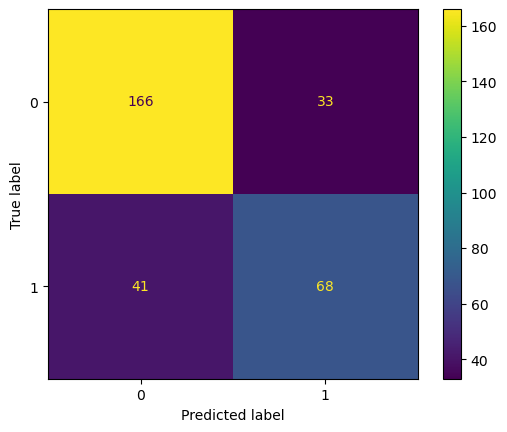

<Figure size 640x480 with 0 Axes>

In [61]:
confusion_matrix = metrics.confusion_matrix(y_test_classes, y_pred_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1'])
cm_display.plot()
plt.show()
plt.savefig('linrCM.png')

In [69]:
#Predicting diabetes risk for prediabetes level among obese individuals across all age groups  
features = np.array([[1, 2, 2, 25,125,4,0.200,1]])
print('Among Children :',logit_reg.predict(features))

features = np.array([[1, 2, 2, 25,125,4,0.200,2]])
print('Among Youth :',logit_reg.predict(features))

features = np.array([[1, 2, 2, 25,125,4,0.200,3]])
print('Among Adults :',logit_reg.predict(features))

features = np.array([[1, 2, 2, 25,125,4,0.200,4]])
print('Among Seniors :',logit_reg.predict(features))



Among Children : [0]
Among Youth : [0]
Among Adults : [0]
Among Seniors : [1]


In [75]:
#Predicting diabetes risk for prediabetes level among individuals with high blood pressure across all age groups  
features = np.array([[1, 2, 3, 25,125,4,0.200,1]])
print('Among Children :',logit_reg.predict(features))

features = np.array([[1, 2, 3, 25,125,4,0.200,2]])
print('Among Youth :',logit_reg.predict(features))

features = np.array([[1, 2, 3, 25,125,4,0.200,3]])
print('Among Adults :',logit_reg.predict(features))

features = np.array([[1, 2, 3, 25,125,4,0.200,4]])
print('Among Seniors :',logit_reg.predict(features))


Among Children : [0]
Among Youth : [0]
Among Adults : [0]
Among Seniors : [1]


In [77]:
##Predicting diabetes risk for diabetes level among individuals with high blood pressure across all age groups  
features = np.array([[1, 3, 2, 25,125,4,0.200,1]])
print('Among Children :',logit_reg.predict(features))

features = np.array([[1,3, 2, 25,125,4,0.200,2]])
print('Among Youth :',logit_reg.predict(features))

features = np.array([[1, 3, 2, 25,125,4,0.200,3]])
print('Among Adults :',logit_reg.predict(features))

features = np.array([[1, 3, 2, 25,125,4,0.200,4]])
print('Among Seniors :',logit_reg.predict(features))


Among Children : [0]
Among Youth : [0]
Among Adults : [1]
Among Seniors : [1]
